In [4]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.types import StringType, BooleanType
import matplotlib.pyplot as plt

# Data Understanding Section

## Loading the dataset and spark setup

In [2]:
spark = SparkSession.builder.appName("myapp").master('local[*]').getOrCreate()

24/11/08 22:44:06 WARN Utils: Your hostname, MacBook-Pro-di-Lorenzo-2.local resolves to a loopback address: 127.0.0.1; using 172.20.10.3 instead (on interface en0)
24/11/08 22:44:06 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/08 22:44:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df = spark.read.csv('dataset/Base.csv', header=True, inferSchema=True)

Here i'm checking how many cores are being used by spark

In [4]:
num_cores = spark.sparkContext.defaultParallelism
print(f"Spark is using {num_cores} cores.")

Spark is using 12 cores.


## Exploring the dataset

In [5]:
df.show()

24/11/07 15:27:37 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----------+------------------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+------------+------------------+------------------+------------------+--------------------+--------------------------------+-----------------+-----------------+-------------+--------------+----------------+------------------+-----------------+---------------+---------------------+---------------+--------+-------------------------+---------+------------------+-------------------------+------------------+-----+
|fraud_bool|            income|name_email_similarity|prev_address_months_count|current_address_months_count|customer_age|days_since_request|intended_balcon_amount|payment_type|zip_count_4w|       velocity_6h|      velocity_24h|       velocity_4w|bank_branch_count_8w|date_of_birth_distinct_emails_4w|employment_status|credit_risk_score|email_is_free|housing_status|phone_home_valid|phone_mobile_valid|bank_month

In [23]:
# Print the schema of the DataFrame
df.printSchema()

root
 |-- fraud_bool: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- name_email_similarity: double (nullable = true)
 |-- prev_address_months_count: integer (nullable = true)
 |-- current_address_months_count: integer (nullable = true)
 |-- customer_age: integer (nullable = true)
 |-- days_since_request: double (nullable = true)
 |-- intended_balcon_amount: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- zip_count_4w: integer (nullable = true)
 |-- velocity_6h: double (nullable = true)
 |-- velocity_24h: double (nullable = true)
 |-- velocity_4w: double (nullable = true)
 |-- bank_branch_count_8w: integer (nullable = true)
 |-- date_of_birth_distinct_emails_4w: integer (nullable = true)
 |-- employment_status: string (nullable = true)
 |-- credit_risk_score: integer (nullable = true)
 |-- email_is_free: integer (nullable = true)
 |-- housing_status: string (nullable = true)
 |-- phone_home_valid: integer (nullable = true)
 |-- phone_mobil

## Get the number of unique values in each column of the DataFrame

In [24]:
for col_name in df.columns:
    print(f"The column '{col_name}' has {df.select(col_name).distinct().count()} unique values.")

The column 'fraud_bool' has 2 unique values.


The column 'income' has 9 unique values.


The column 'name_email_similarity' has 998861 unique values.


The column 'prev_address_months_count' has 374 unique values.


The column 'current_address_months_count' has 423 unique values.


The column 'customer_age' has 9 unique values.


The column 'days_since_request' has 989330 unique values.


The column 'intended_balcon_amount' has 994971 unique values.


The column 'payment_type' has 5 unique values.


The column 'zip_count_4w' has 6306 unique values.


The column 'velocity_6h' has 998687 unique values.


The column 'velocity_24h' has 998940 unique values.


The column 'velocity_4w' has 998318 unique values.


The column 'bank_branch_count_8w' has 2326 unique values.


The column 'date_of_birth_distinct_emails_4w' has 40 unique values.


The column 'employment_status' has 7 unique values.


The column 'credit_risk_score' has 551 unique values.


The column 'email_is_free' has 2 unique values.


The column 'housing_status' has 7 unique values.


The column 'phone_home_valid' has 2 unique values.


The column 'phone_mobile_valid' has 2 unique values.


The column 'bank_months_count' has 33 unique values.


The column 'has_other_cards' has 2 unique values.


The column 'proposed_credit_limit' has 12 unique values.


The column 'foreign_request' has 2 unique values.


The column 'source' has 2 unique values.


The column 'session_length_in_minutes' has 994887 unique values.


The column 'device_os' has 5 unique values.


The column 'keep_alive_session' has 2 unique values.


The column 'device_distinct_emails_8w' has 4 unique values.


The column 'device_fraud_count' has 1 unique values.


The column 'month' has 8 unique values.


## Looking for missing values

In [47]:
#Check if there are any missing values
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----------+------+---------------------+-------------------------+----------------------------+------------+------------------+----------------------+------------+------------+-----------+------------+-----------+--------------------+--------------------------------+-----------------+-----------------+-------------+--------------+----------------+------------------+-----------------+---------------+---------------------+---------------+------+-------------------------+---------+------------------+-------------------------+------------------+-----+
|fraud_bool|income|name_email_similarity|prev_address_months_count|current_address_months_count|customer_age|days_since_request|intended_balcon_amount|payment_type|zip_count_4w|velocity_6h|velocity_24h|velocity_4w|bank_branch_count_8w|date_of_birth_distinct_emails_4w|employment_status|credit_risk_score|email_is_free|housing_status|phone_home_valid|phone_mobile_valid|bank_months_count|has_other_cards|proposed_credit_limit|foreign_request|sour

There are no missing values in the dataset

## Checking the data types and values of the columns

In [49]:
#Check for outliers
df.describe().show()

+-------+-------------------+-------------------+---------------------+-------------------------+----------------------------+------------------+--------------------+----------------------+------------+------------------+-------------------+------------------+-----------------+--------------------+--------------------------------+-----------------+-----------------+------------------+--------------+-------------------+-------------------+------------------+-----------------+---------------------+-------------------+--------+-------------------------+---------+-------------------+-------------------------+------------------+------------------+
|summary|         fraud_bool|             income|name_email_similarity|prev_address_months_count|current_address_months_count|      customer_age|  days_since_request|intended_balcon_amount|payment_type|      zip_count_4w|        velocity_6h|      velocity_24h|      velocity_4w|bank_branch_count_8w|date_of_birth_distinct_emails_4w|employment_status

## Looking at the distribution of the target variable 'fraud_bool'

In [6]:
#Distribution of the target variable 'fraud_bool'
df.groupBy('fraud_bool').count().show()

#Print the distribution in percentage
df.groupBy('fraud_bool').count().withColumn('percentage', col('count') / df.count() * 100).show()

+----------+------+
|fraud_bool| count|
+----------+------+
|         1| 11029|
|         0|988971|
+----------+------+


+----------+------+-----------------+
|fraud_bool| count|       percentage|
+----------+------+-----------------+
|         1| 11029|           1.1029|
|         0|988971|98.89710000000001|
+----------+------+-----------------+


[Text(0, 0, 'Non Fraudulent'), Text(1, 0, 'Fraudulent')]

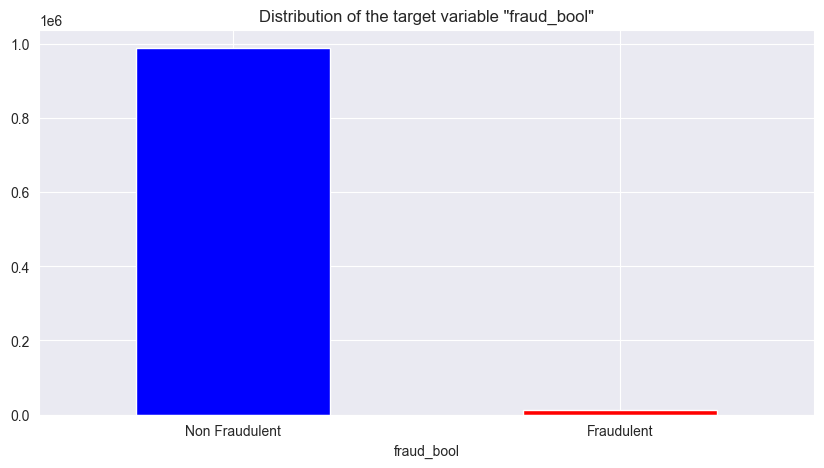

In [10]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Plot the distribution of the 'fraud_bool' column
plot = pandas_df['fraud_bool'].value_counts().plot(kind='bar', figsize=(10, 5), title='Distribution of the target variable "fraud_bool"', color=['blue', 'red'])
plot.set_xticklabels(['Non Fraudulent', 'Fraudulent'], rotation=0)

The dataset is, as expected, highly imbalanced towards the non-fraudulent transactions. This is a common issue in fraud detection problems, and we will need to address it later on.

## Looking at the distribution of the Income Value

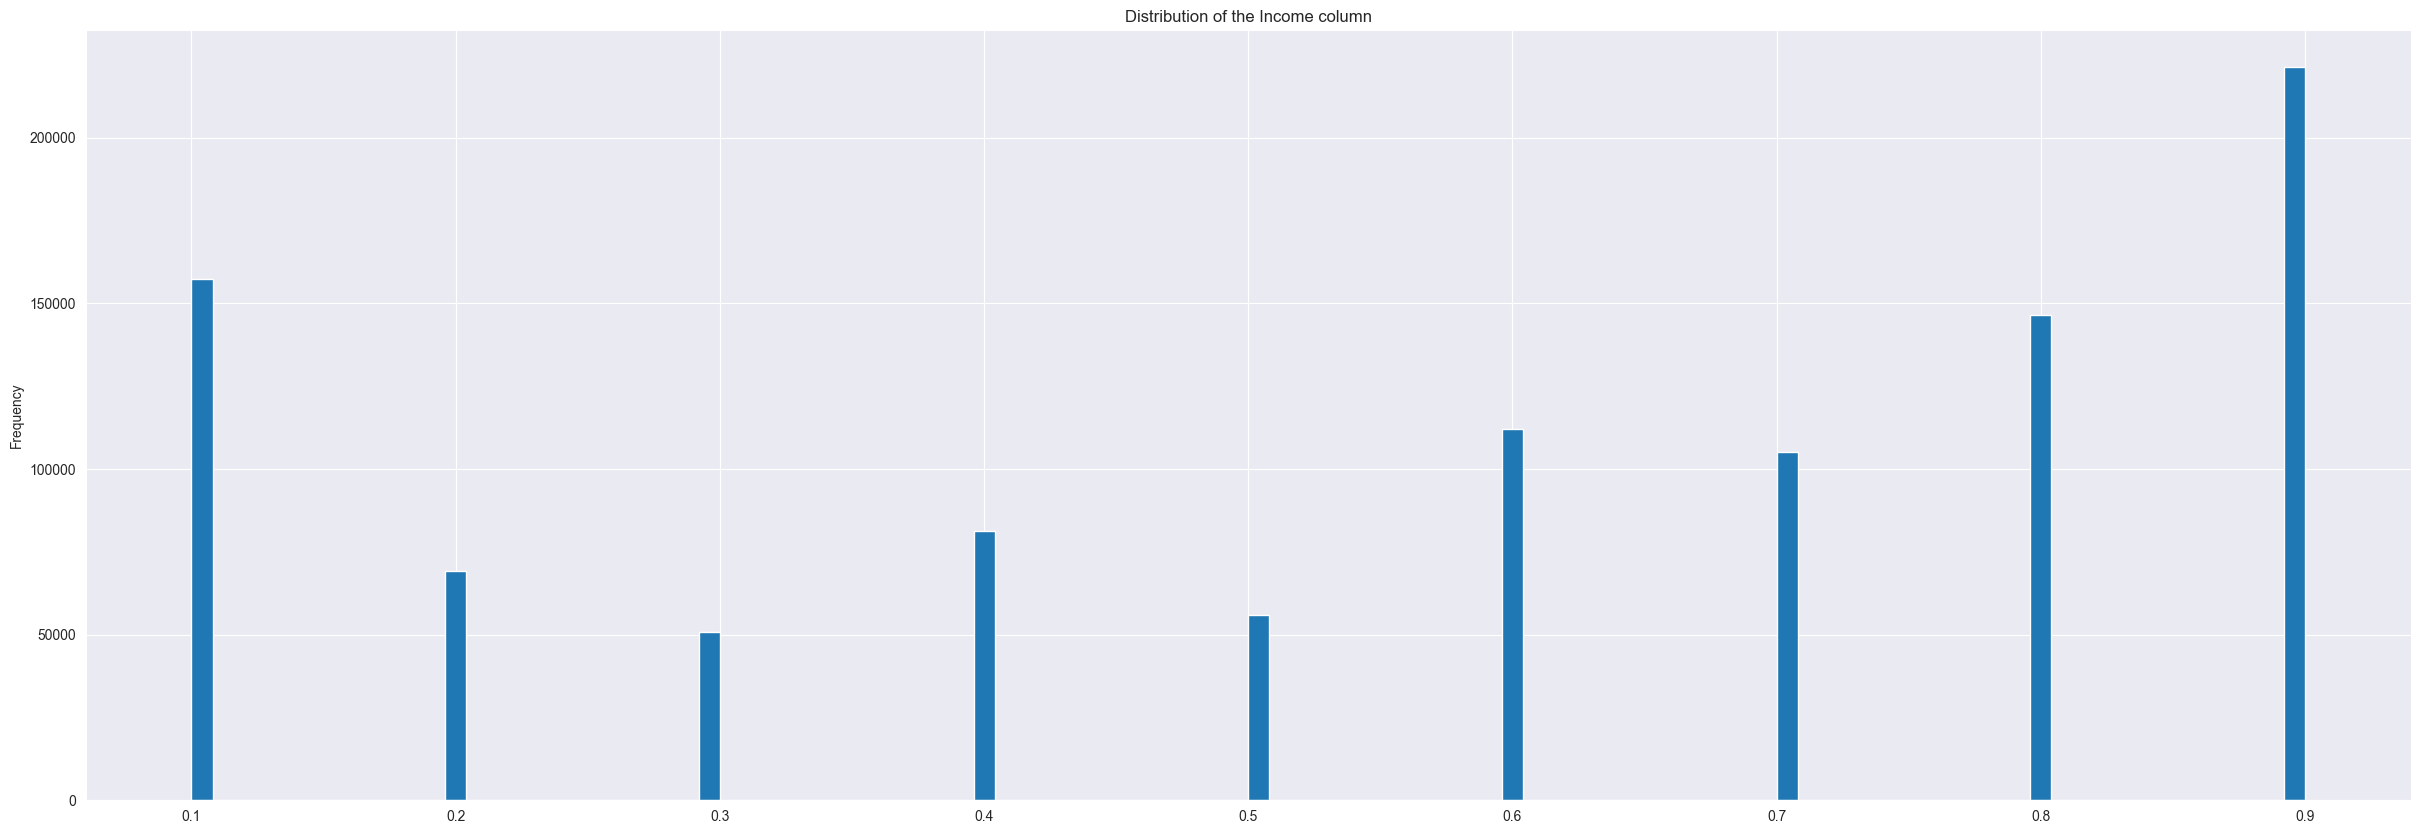

In [5]:
# Plotting the distribution of the 'Income' column

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Plot the distribution of the 'Income' column
pandas_df['income'].plot(kind='hist', bins=100, figsize=(30, 10), title='Distribution of the Income column')
plt.show()

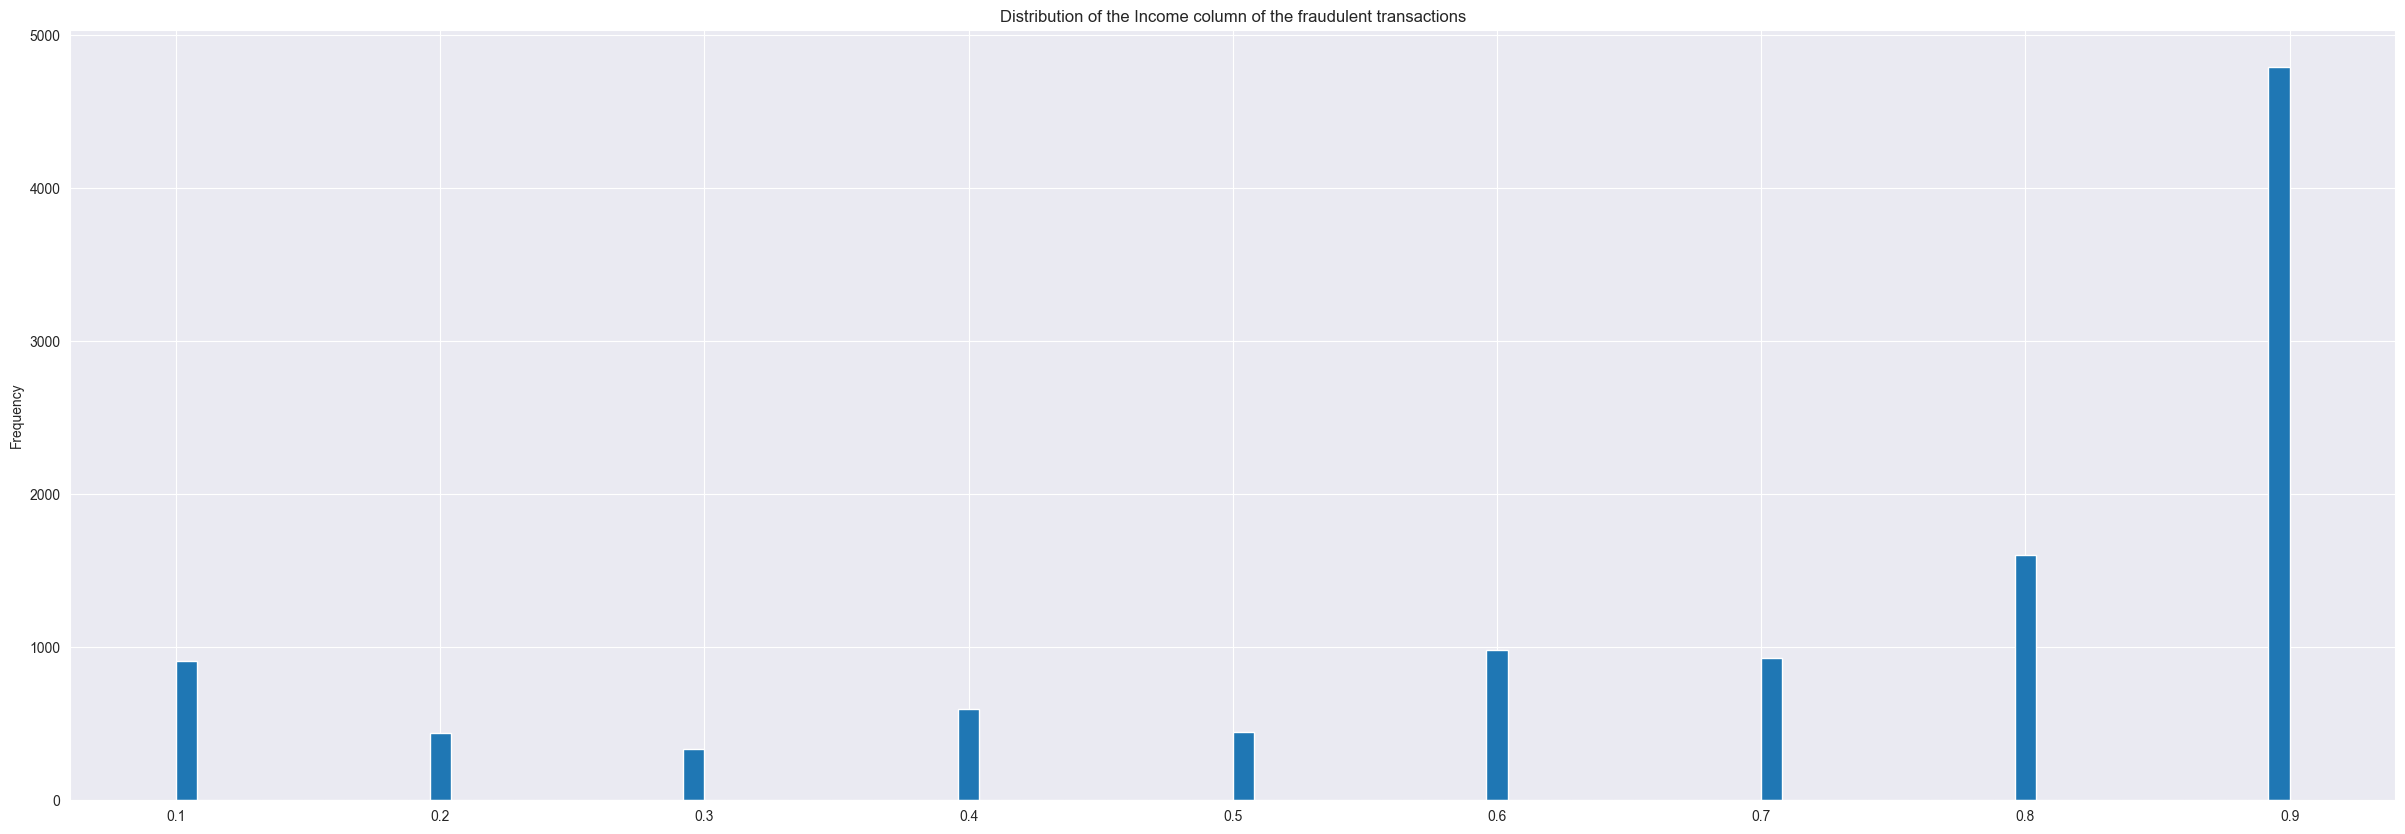

In [11]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Plot the distribution of the 'Income' column of the fraudulent transactions
pandas_df[pandas_df['fraud_bool'] == 1]['income'].plot(kind='hist', bins=100, figsize=(30, 10), title='Distribution of the Income column of the fraudulent transactions')
plt.show()

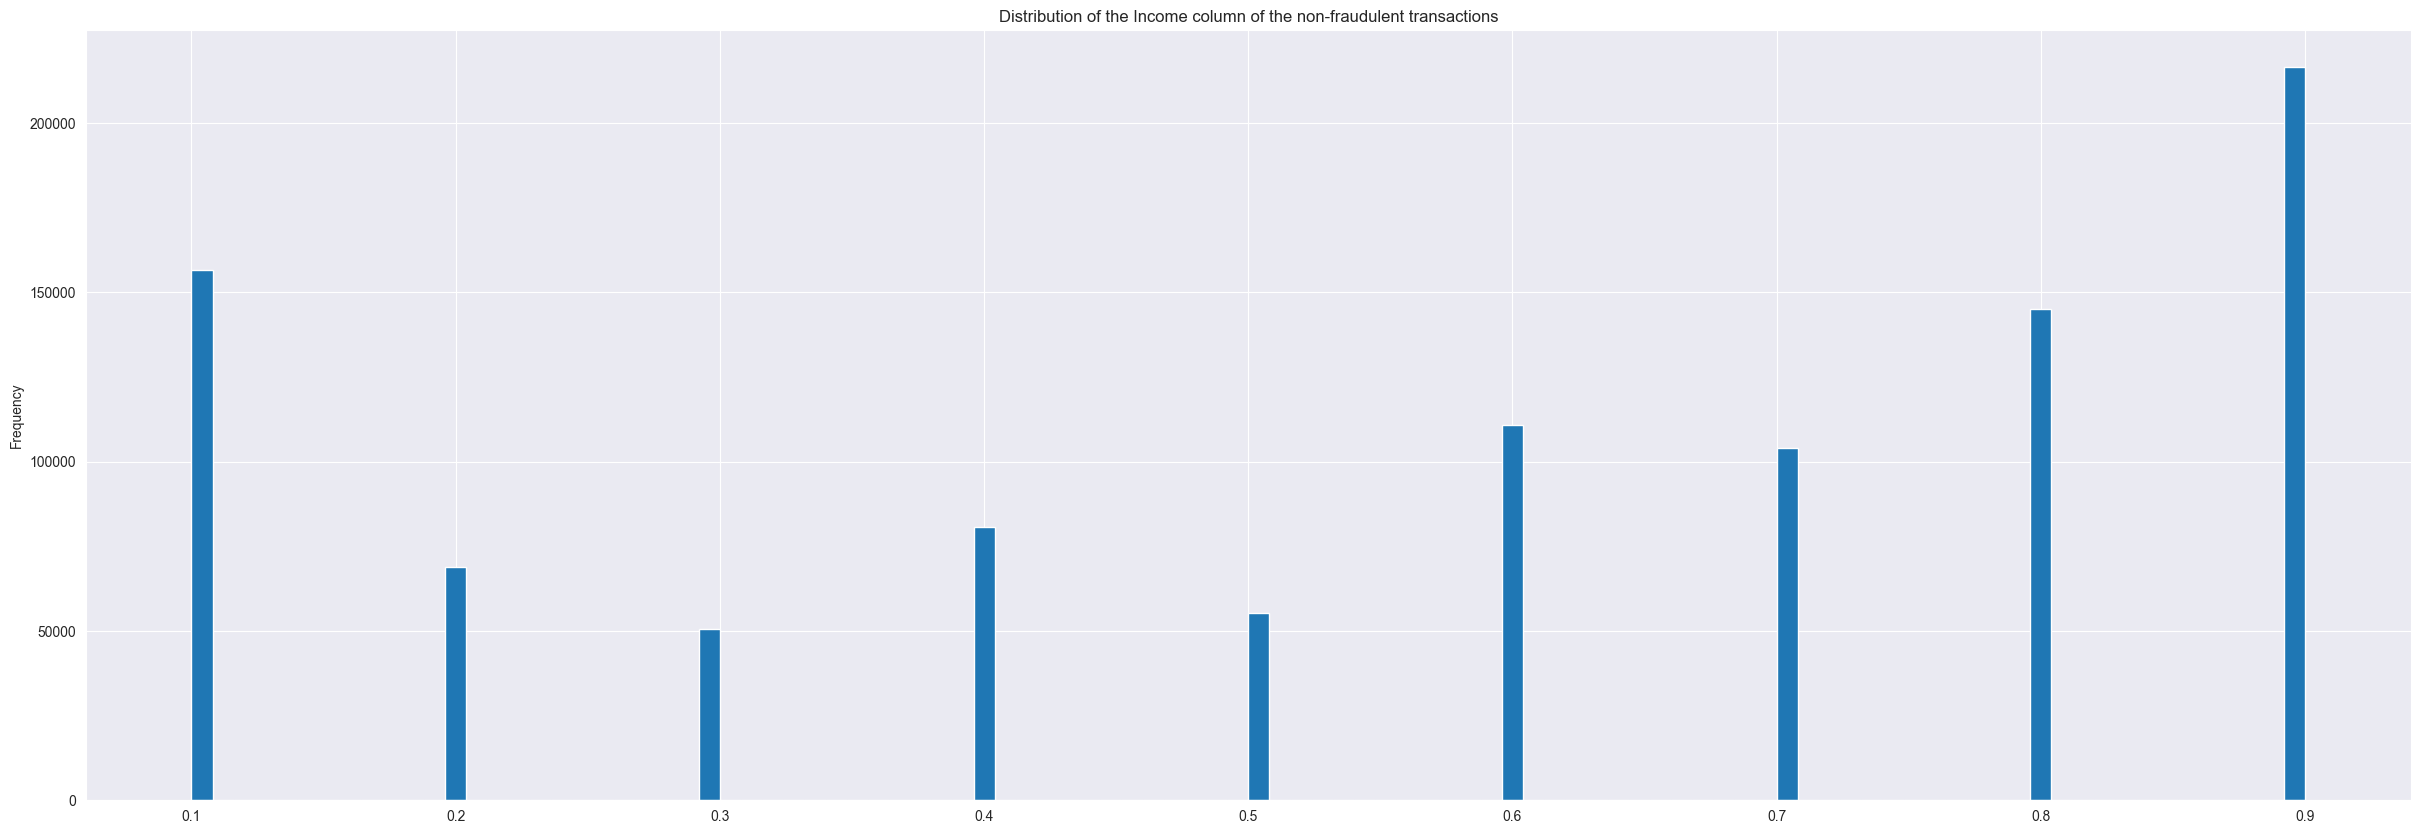

In [12]:
pandas_df[pandas_df['fraud_bool'] == 0]['income'].plot(kind='hist', bins=100, figsize=(30, 10),
                                                       title='Distribution of the Income column of the non-fraudulent transactions')
plt.show()

We can notice that the fraudulent transactions applicants have a higher income value compared to the non-fraudulent transactions. 

## Looking at the distribution of the Age Value

In [14]:
df.groupBy('customer_age').count().show()

+------------+------+
|customer_age| count|
+------------+------+
|          40|238712|
|          20|245855|
|          10| 20987|
|          50|140353|
|          80|  1297|
|          70|  6517|
|          60| 34770|
|          90|    76|
|          30|311433|
+------------+------+


We can see that the age values are not continuous, but discrete. This is because the age values are binned into ranges. Also the majority of the customers are in the age range of 20-40.

In [20]:
non_fraudulent_age = df.filter(df['fraud_bool'] == 0).groupBy('customer_age').count()
non_fraudulent_age = non_fraudulent_age.withColumn('percentage', (col('count') / df.filter(df['fraud_bool'] == 0).count()) * 100)
non_fraudulent_age = non_fraudulent_age.orderBy('percentage', ascending=False)
print("Non-Fraudulent Transactions by Customer Age:")
non_fraudulent_age.show()

Non-Fraudulent Transactions by Customer Age:


+------------+------+--------------------+
|customer_age| count|          percentage|
+------------+------+--------------------+
|          30|308844|  31.228822685397244|
|          20|244650|  24.737833566403868|
|          40|235836|  23.846604197696394|
|          50|137548|  13.908193465733575|
|          60| 33621|  3.3995941235890634|
|          10| 20913|   2.114622167889655|
|          70|  6254|  0.6323744578961366|
|          80|  1233| 0.12467504102749222|
|          90|    72|0.007280294366568889|
+------------+------+--------------------+


In [21]:
# Filter for fraudulent transactions, group by customer_age, count occurrences, and calculate percentage
fraudulent_age = df.filter(df['fraud_bool'] == 1).groupBy('customer_age').count()
fraudulent_age = fraudulent_age.withColumn('percentage', (col('count') / df.filter(df['fraud_bool'] == 1).count()) * 100)
fraudulent_age = fraudulent_age.orderBy('percentage', ascending=False)
print("Fraudulent Transactions by Customer Age:")
fraudulent_age.show()

Fraudulent Transactions by Customer Age:


+------------+-----+-------------------+
|customer_age|count|         percentage|
+------------+-----+-------------------+
|          40| 2876| 26.076706863722915|
|          50| 2805| 25.432949496781216|
|          30| 2589| 23.474476380451538|
|          20| 1205|   10.9257412276725|
|          60| 1149| 10.417988938253695|
|          70|  263|  2.384622359234745|
|          10|   74|  0.670958382446278|
|          80|   64| 0.5802883307643485|
|          90|    4|0.03626802067277178|
+------------+-----+-------------------+


From these data i think that we can say that there is a slight shift in fraudulent transactions towards the brackets 40 and 50 compared to non-fraudulent ones. The lower percentage of fraudulent transactions among young people like those in the 20 bracket could indicate more attention by the customers or maybe that having in general less money they tend to be less targeted by fraudsters. 

## Checking the number of missing values among the columns that by dataset description contains them with the value '-1'

In [5]:
import pandas as pd

# List of features to check for missing values
missing_features = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# Initialize an empty DataFrame to hold the percentage of missing values for each feature
missing_vals = pd.DataFrame()

# For each feature, replace -1 values with NaN, calculate the percentage of missing values, and add to the missing_vals DataFrame
for feature in missing_features:
    df = df.withColumn(feature, when(col(feature) < 0, None).otherwise(col(feature)))  # Replace -1 values with NaN
    missing_vals_col = df.groupBy('fraud_bool').agg(
        (count(when(col(feature).isNull(), feature)) / count('*') * 100).alias(feature)
    ).toPandas().set_index('fraud_bool')[feature]
    missing_vals[feature] = missing_vals_col

print(missing_vals)

            prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
1                           91.885030                      0.126938   
0                           71.062347                      0.428728   

            intended_balcon_amount  bank_months_count  \
fraud_bool                                              
1                        88.376099          37.537401   
0                        74.094791          25.227737   

            session_length_in_minutes  device_distinct_emails_8w  
fraud_bool                                                        
1                            0.163206                   0.036268  
0                            0.201927                   0.035896  


In [6]:
# Reshape the missing_vals DataFrame from wide to long format
missing_vals = pd.DataFrame(missing_vals.T.stack())

# Reset the index and rename the columns
missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

print(missing_vals)

                         feature  fraud_bool  missing_vals
0      prev_address_months_count           1     91.885030
1      prev_address_months_count           0     71.062347
2   current_address_months_count           1      0.126938
3   current_address_months_count           0      0.428728
4         intended_balcon_amount           1     88.376099
5         intended_balcon_amount           0     74.094791
6              bank_months_count           1     37.537401
7              bank_months_count           0     25.227737
8      session_length_in_minutes           1      0.163206
9      session_length_in_minutes           0      0.201927
10     device_distinct_emails_8w           1      0.036268
11     device_distinct_emails_8w           0      0.035896


<Figure size 800x600 with 0 Axes>

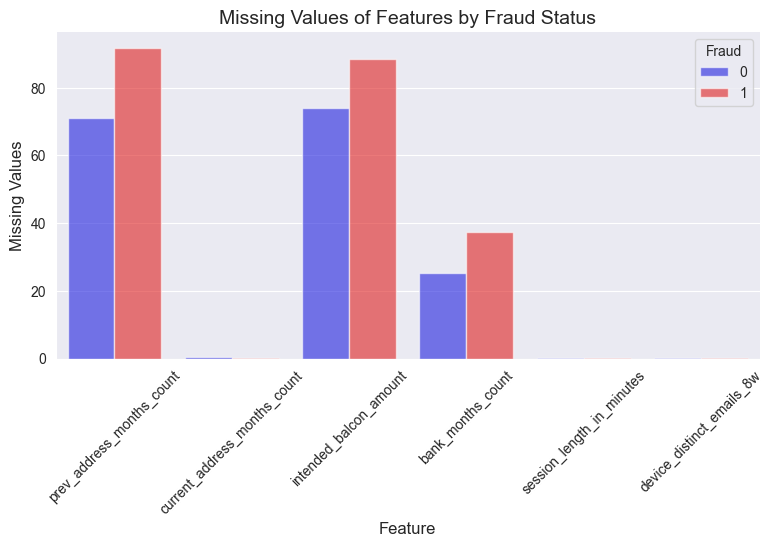

In [12]:
import seaborn as sns

# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.catplot(data=missing_vals, kind="bar", x="feature", y="missing_vals", hue="fraud_bool", alpha=.6, height=4, aspect=2, legend=True, legend_out=False, palette=['blue', 'red'])

# Customize labels and legend
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Missing Values", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Missing Values of Features by Fraud Status", fontsize=14)
plt.legend(title="Fraud", fontsize=10)

# Display plot
plt.show()

When examining features like prev_address_months_count, intended_balcon_amount, and bank_months_count, it becomes apparent that a considerable number of missing values exist in their original distribution. However, despite these missing values, these features still hold informative value and exhibit correlation with the target feature.